# Import Libraries

In [1]:
# load data and process data
import numpy as np
import pandas as pd
import warnings
import json
import math
import joblib
%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import stat
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest

# mount drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Load Data

In [2]:
# define path data
path_data = '/content/drive/MyDrive/Dibimbing_DS/final_project_DS/dataset/processed/'


# load train_set
train_set_processed = joblib.load(path_data + 'train_set_processed.joblib')
train_set_processed_scaled = joblib.load(path_data + 'train_set_processed_scaled.joblib')

# load test_set
test_set_processed = joblib.load(path_data + 'test_set_processed.joblib')
test_set_processed_scaled = joblib.load(path_data + 'test_set_processed_scaled.joblib')

# Check and Validate Data

In [3]:
train_set_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 318 to 665
Data columns (total 77 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bankrupt                                                 5455 non-null   int64  
 1   roa(c) before interest and depreciation before interest  5455 non-null   float64
 2   roa(a) before interest and % after tax                   5455 non-null   float64
 3   roa(b) before interest and depreciation after tax        5455 non-null   float64
 4   operating gross margin                                   5455 non-null   float64
 5   realized sales gross margin                              5455 non-null   float64
 6   operating profit rate                                    5455 non-null   float64
 7   pre-tax net interest rate                                5455 non-null   float64
 8   after-tax net interest rate     

In [4]:
train_set_processed.describe().T

,count,mean,std,min,25%,50%,75%,max
bankrupt,5455.0,0.032264,0.176717,0.000000,0.000000,0.000000,0.000000,1.000000
roa(c) before interest and depreciation before interest,5455.0,0.504447,0.060354,0.024277,0.476113,0.502121,0.534612,1.000000
roa(a) before interest and % after tax,5455.0,0.557818,0.065355,0.000000,0.535379,0.559365,0.587958,1.000000
roa(b) before interest and depreciation after tax,5455.0,0.552946,0.061401,0.033514,0.527143,0.551689,0.582740,1.000000
operating gross margin,5455.0,0.607765,0.017047,0.000000,0.600473,0.605983,0.613817,0.665151
realized sales gross margin,5455.0,0.607742,0.017028,0.000000,0.600463,0.605918,0.613694,0.666023
operating profit rate,5455.0,0.998781,0.013556,0.000000,0.998969,0.999022,0.999092,1.000000
pre-tax net interest rate,5455.0,0.797255,0.011467,0.000000,0.797386,0.797462,0.797576,1.000000
after-tax net interest rate,5455.0,0.809178,0.010480,0.084286,0.809311,0.809374,0.809467,1.000000
non-industry income and expenditure/revenue,5455.0,0.303683,0.011607,0.062507,0.303467,0.303525,0.303583,1.000000


Fitur numerik semua dan sesuai dengan hasil EDA terakhir, namun hal yang perlu dicek sebelum melakukan pemilihan fitur adalah mengidentifikasi fitur mana yang numerik dan mana yang kategorikal yang sudah di-encode.

In [5]:
# create list cat cols
categorical_binary_cols = []

for col in train_set_processed.columns:
    # Check the unique value
    if train_set_processed[col].nunique() <= 2:
        print(f"\n>>> Fitur '{col}' memiliki {train_set_processed[col].nunique()} nilai unik:")
        print(train_set_processed[col].value_counts())

        # add to list
        categorical_binary_cols.append(col)


print("\n------------------")

if categorical_binary_cols:
    print(f"\nDitemukan {len(categorical_binary_cols)} fitur yang kemungkinan adalah kategorikal biner:")
    print(categorical_binary_cols)
else:
    print("\nTidak ditemukan fitur dengan 2 nilai unik atau kurang.")


>>> Fitur 'bankrupt' memiliki 2 nilai unik:
bankrupt
0    5279
1     176
Name: count, dtype: int64

>>> Fitur 'liability-assets flag' memiliki 2 nilai unik:
liability-assets flag
0    5450
1       5
Name: count, dtype: int64

------------------

Ditemukan 2 fitur yang kemungkinan adalah kategorikal biner:
['bankrupt', 'liability-assets flag']


# Feature Selection

## ANOVA (F-value)

In [6]:
# get features (numeric) and target
X_train = train_set_processed.drop(columns='bankrupt')
y_train = train_set_processed['bankrupt']

numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
X_train_numeric = X_train[numeric_features]

# drop binary col (categorical)
X_train_numeric = X_train_numeric.drop(columns='liability-assets flag')
numeric_features.remove('liability-assets flag')

# calculate anova (f_classif)
f_selector = SelectKBest(score_func=f_classif, k='all')
f_selector.fit(X_train_numeric, y_train)

# get result into pandas
anova_results = pd.DataFrame({
    'Fitur': numeric_features,
    'F-Score': f_selector.scores_,
    'P-Value': f_selector.pvalues_
})

# sorted by p-value
anova_results_sorted = anova_results.sort_values(by='P-Value', ascending=True).reset_index(drop=True)


In [7]:
anova_results_sorted

,Fitur,F-Score,P-Value
0,net income to total assets,606.425468,4.677976e-127
1,total debt/total net worth,539.193209,8.029721e-114
2,roa(a) before interest and % after tax,477.709419,1.383835e-101
3,roa(b) before interest and depreciation after tax,446.890967,2.106274e-95
4,roa(c) before interest and depreciation before...,404.096711,9.199569e-87
5,net worth/assets,356.263083,5.002916e-77
6,debt ratio %,356.263083,5.002916e-77
7,persistent eps in the last four seasons,280.030327,2.453080e-61
8,retained earnings to total assets,261.299523,1.900779e-57
9,net income to stockholder's equity,243.249108,1.096358e-53


In [8]:
# check the features are not signifinact (ground rule 0.05)
fitur_tidak_signifikan = anova_results_sorted[anova_results_sorted['P-Value'] > 0.05]

fitur_tidak_signifikan

,Fitur,F-Score,P-Value
56,current liability to liability,2.479516,0.115396
57,current liabilities/liability,2.479516,0.115396
58,realized sales gross profit growth rate,1.683683,0.194491
59,non-industry income and expenditure/revenue,1.347841,0.245707
60,operating profit growth rate,1.305857,0.253196
61,net worth turnover rate (times),0.924448,0.336353
62,degree of financial leverage (dfl),0.839461,0.359592
63,after-tax net interest rate,0.507498,0.476254
64,continuous interest rate (after tax),0.478180,0.489277
65,pre-tax net interest rate,0.473022,0.491629


Hasil ini menjadi landasan untuk menghapus fitur2 di atas. Selain itu, pengecekan terhadap data yang di-scaled tidak perlu dilakukan karena hasilnya akan kurang lebih sama saja dengan data yang tidak di-*scaled*. *Scaling* hanya mengubah skala hitung bukan distribusi data

In [9]:
fitur_tidak_signifikan['Fitur']

,Fitur
56,current liability to liability
57,current liabilities/liability
58,realized sales gross profit growth rate
59,non-industry income and expenditure/revenue
60,operating profit growth rate
61,net worth turnover rate (times)
62,degree of financial leverage (dfl)
63,after-tax net interest rate
64,continuous interest rate (after tax)
65,pre-tax net interest rate


In [10]:
# get value in Fitur in fitur_tidak_signifikan
features_to_drop = fitur_tidak_signifikan['Fitur'].tolist()

# drop features in "fitur_tidak_signifikan"
train_set_processed = train_set_processed.drop(columns=features_to_drop)
test_set_processed = test_set_processed.drop(columns=features_to_drop)

train_set_processed_scaled = train_set_processed_scaled.drop(columns=features_to_drop)
test_set_processed_scaled = test_set_processed_scaled.drop(columns=features_to_drop)

In [11]:
train_set_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 318 to 665
Data columns (total 58 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bankrupt                                                 5455 non-null   int64  
 1   roa(c) before interest and depreciation before interest  5455 non-null   float64
 2   roa(a) before interest and % after tax                   5455 non-null   float64
 3   roa(b) before interest and depreciation after tax        5455 non-null   float64
 4   operating gross margin                                   5455 non-null   float64
 5   realized sales gross margin                              5455 non-null   float64
 6   persistent eps in the last four seasons                  5455 non-null   float64
 7   operating profit per share (yuan ¥)                      5455 non-null   float64
 8   per share net profit before tax 

In [12]:
test_set_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1364 entries, 1244 to 652
Data columns (total 58 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bankrupt                                                 1364 non-null   int64  
 1   roa(c) before interest and depreciation before interest  1364 non-null   float64
 2   roa(a) before interest and % after tax                   1364 non-null   float64
 3   roa(b) before interest and depreciation after tax        1364 non-null   float64
 4   operating gross margin                                   1364 non-null   float64
 5   realized sales gross margin                              1364 non-null   float64
 6   persistent eps in the last four seasons                  1364 non-null   float64
 7   operating profit per share (yuan ¥)                      1364 non-null   float64
 8   per share net profit before tax

## Matrix Correlation

### Faktor Profitabilitas

In [13]:
faktor_profitabilitas = [
    'bankrupt',
    'roa(c) before interest and depreciation before interest',
    'roa(a) before interest and % after tax',
    'roa(b) before interest and depreciation after tax',
    'operating gross margin',
    'realized sales gross margin',
    'persistent eps in the last four seasons',
    'operating profit per share (yuan ¥)',
    'per share net profit before tax (yuan ¥)',
    'operating profit/paid-in capital',
    'net profit before tax/paid-in capital',
    'operating profit per person',
    'retained earnings to total assets',
    'net income to total assets',
    'gross profit to sales',
    "net income to stockholder's equity"
]

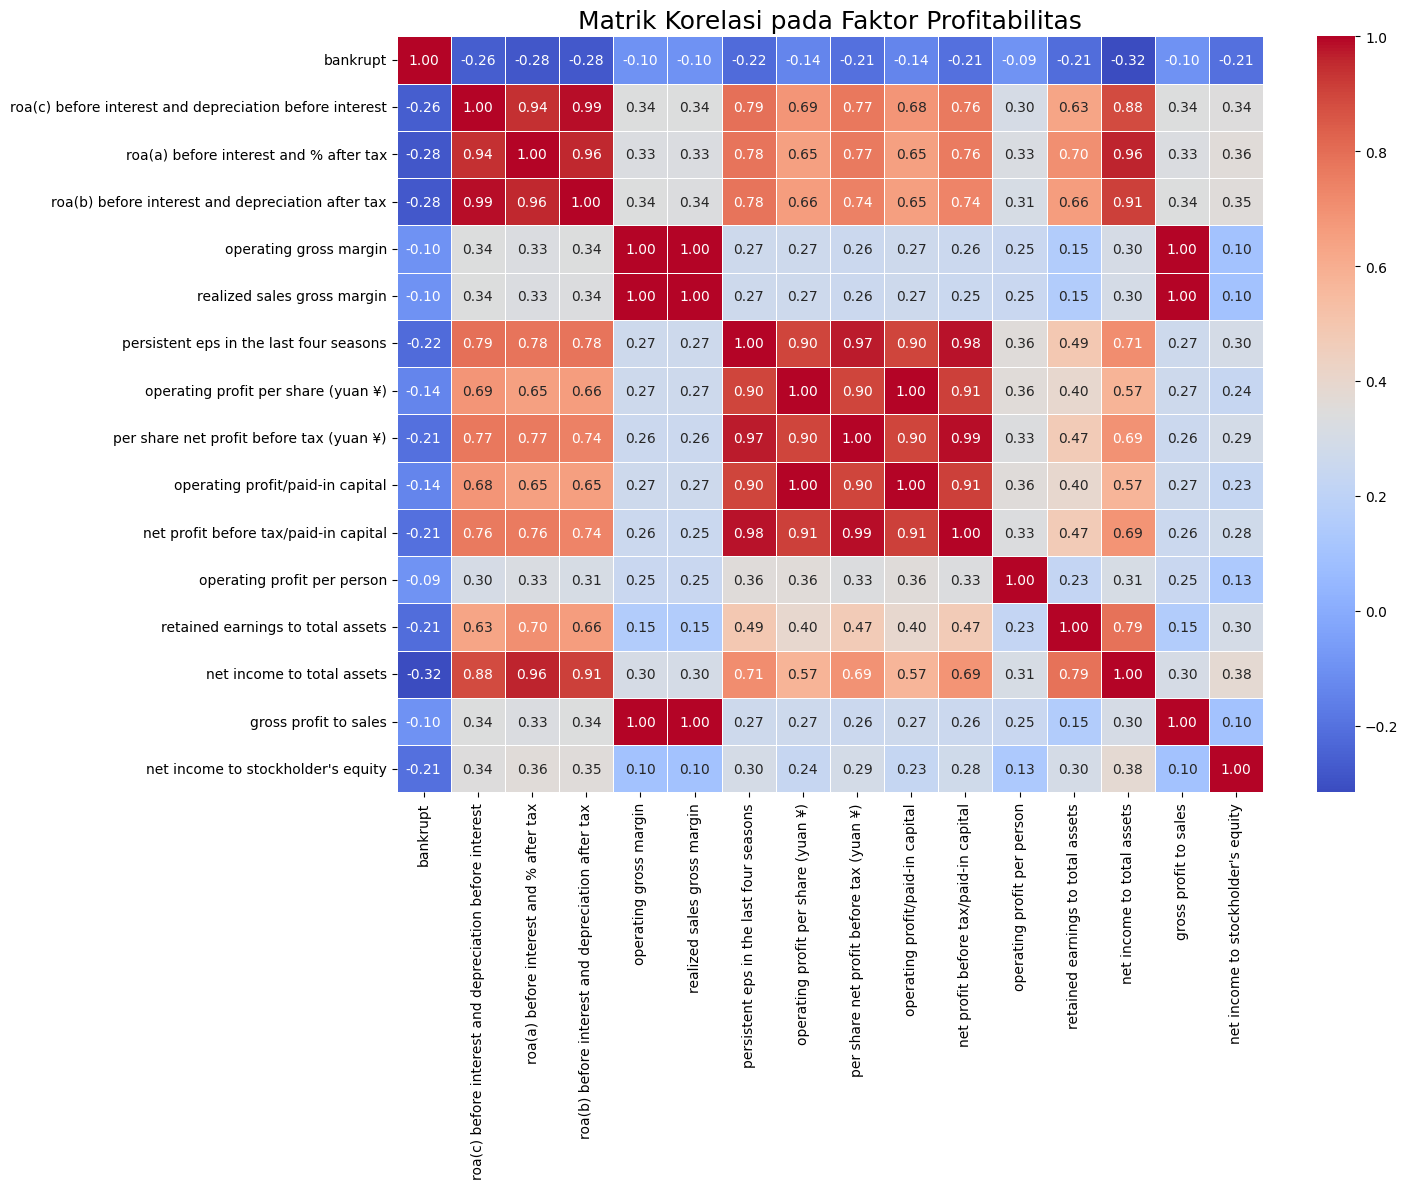

In [21]:
# get data
corr_matrix_profit = train_set_processed[faktor_profitabilitas].corr()

# visualize
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix_profit,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidth=.5)

plt.title('Matrik Korelasi pada Faktor Profitabilitas', fontsize=18)
plt.tight_layout()

Berdasarkan hasil di atas, beberapa variabel yang redundan antara lain:
* Grup ROA: roa(c), roa(a), dan roa(b) memiliki korelasi di atas 0.93 satu sama lain. Mereka mengukur hal yang sangat mirip.

* Grup Margin: operating gross margin dan realized sales gross margin memiliki korelasi 1.00, artinya mereka identik.

* Grup Laba per Saham/Modal: Blok besar di tengah (persistent eps hingga operating profit per person) menunjukkan banyak korelasi di atas 0.90.

Namun satu hal yang pasti, faktor profitabilitas memiliki korelasi negatif terhadap target

In [22]:
corr_matrix_profit = train_set_processed[faktor_profitabilitas].corr()

display(corr_matrix_profit)

,bankrupt,roa(c) before interest and depreciation before interest,roa(a) before interest and % after tax,roa(b) before interest and depreciation after tax,operating gross margin,realized sales gross margin,persistent eps in the last four seasons,operating profit per share (yuan ¥),per share net profit before tax (yuan ¥),operating profit/paid-in capital,net profit before tax/paid-in capital,operating profit per person,retained earnings to total assets,net income to total assets,gross profit to sales,net income to stockholder's equity
bankrupt,1.000000,-0.262665,-0.283811,-0.275219,-0.097482,-0.097050,-0.221009,-0.137955,-0.205256,-0.136913,-0.206277,-0.092555,-0.213839,-0.316354,-0.097484,-0.206648
roa(c) before interest and depreciation before interest,-0.262665,1.000000,0.939692,0.986632,0.340557,0.338634,0.793848,0.685924,0.773005,0.683388,0.764271,0.302705,0.633073,0.884663,0.340558,0.342610
roa(a) before interest and % after tax,-0.283811,0.939692,1.000000,0.956474,0.330012,0.328000,0.779493,0.649625,0.766799,0.646629,0.760784,0.326044,0.701812,0.961545,0.330014,0.358210
roa(b) before interest and depreciation after tax,-0.275219,0.986632,0.956474,1.000000,0.338043,0.336079,0.782510,0.657039,0.744964,0.654094,0.736765,0.306027,0.656966,0.909866,0.338045,0.352656
operating gross margin,-0.097482,0.340557,0.330012,0.338043,1.000000,0.999465,0.268412,0.269738,0.258330,0.268895,0.255196,0.247396,0.154865,0.301220,1.000000,0.099814
realized sales gross margin,-0.097050,0.338634,0.328000,0.336079,0.999465,1.000000,0.266413,0.268896,0.256475,0.268048,0.253335,0.246873,0.153215,0.299142,0.999464,0.099241
persistent eps in the last four seasons,-0.221009,0.793848,0.779493,0.782510,0.268412,0.266413,1.000000,0.899017,0.971688,0.897424,0.979976,0.356871,0.486014,0.707586,0.268412,0.297078
operating profit per share (yuan ¥),-0.137955,0.685924,0.649625,0.657039,0.269738,0.268896,0.899017,1.000000,0.900689,0.998865,0.907451,0.357363,0.396668,0.573267,0.269738,0.237739
per share net profit before tax (yuan ¥),-0.205256,0.773005,0.766799,0.744964,0.258330,0.256475,0.971688,0.900689,1.000000,0.899369,0.985813,0.333392,0.474169,0.691807,0.258330,0.290656
operating profit/paid-in capital,-0.136913,0.683388,0.646629,0.654094,0.268895,0.268048,0.897424,0.998865,0.899369,1.000000,0.908615,0.356324,0.395042,0.570854,0.268895,0.233624


Berdasarkah hasil korelasi antar fitur di faktor profitabilitas dan target, fitur yang di drop adalah fitur dengan korelasi sangat tinggi (>0.8) dan fitur yang dipilih di antara fitur yang berkorelasi adalah fitur yang memiliki korelasi tertinggi terhadap target (y).

In [23]:
# define col in profitabiliatas to drop
cols_to_drop_in_profit = [
    'roa(c) before interest and depreciation before interest',
    'roa(a) before interest and % after tax',
    'roa(b) before interest and depreciation after tax',
    'realized sales gross margin',
    'gross profit to sales',
    'operating profit per share (yuan ¥)',
    'per share net profit before tax (yuan ¥)',
    'operating profit/paid-in capital',
    'net profit before tax/paid-in capital',
    'retained earnings to total assets'
]

# drop columns
train_set_processed = train_set_processed.drop(columns=cols_to_drop_in_profit)
test_set_processed = test_set_processed.drop(columns=cols_to_drop_in_profit)

train_set_processed_scaled = train_set_processed_scaled.drop(columns=cols_to_drop_in_profit)
test_set_processed_scaled = test_set_processed_scaled.drop(columns=cols_to_drop_in_profit)

In [24]:
train_set_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 318 to 665
Data columns (total 48 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   bankrupt                                     5455 non-null   int64  
 1   operating gross margin                       5455 non-null   float64
 2   persistent eps in the last four seasons      5455 non-null   float64
 3   operating profit per person                  5455 non-null   float64
 4   net income to total assets                   5455 non-null   float64
 5   net income to stockholder's equity           5455 non-null   float64
 6   cash flow rate                               5455 non-null   float64
 7   cash flow per share                          5455 non-null   float64
 8   current ratio                                5455 non-null   float64
 9   quick ratio                                  5455 non-null   float64
 10  work

### Faktor Likuiditas

In [14]:
faktor_likuiditas = [
    'bankrupt',
    'cash flow rate',
    'cash flow per share',
    'current ratio',
    'quick ratio',
    'working capital to total assets',
    'quick assets/total assets',
    'current assets/total assets',
    'cash/total assets',
    'quick assets/current liability',
    'cash flow to total assets',
    'cash flow to liability',
    'cfo to assets',
    'cash flow to equity',
    'current liability to current assets'
]

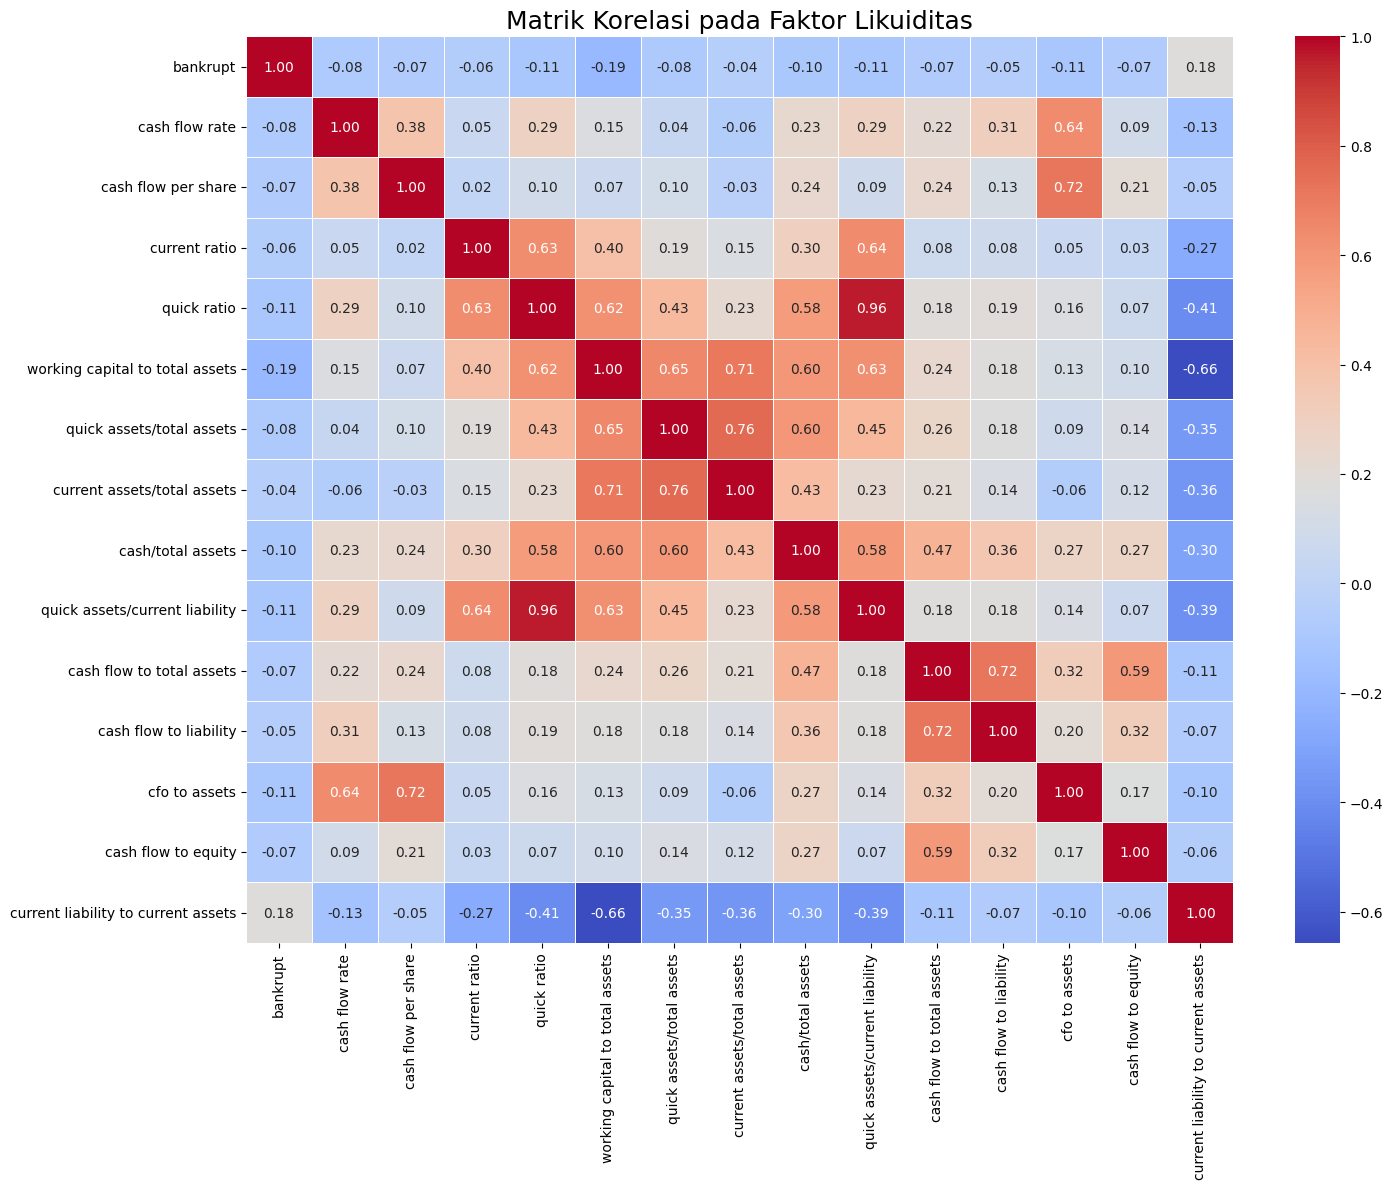

In [25]:
# get data
corr_matrix_likuiditas = train_set_processed[faktor_likuiditas].corr()

# visualize
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix_likuiditas,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidth=.5)

plt.title('Matrik Korelasi pada Faktor Likuiditas', fontsize=18)
plt.tight_layout()

In [26]:
corr_matrix_likuiditas = train_set_processed[faktor_likuiditas].corr()

display(corr_matrix_likuiditas)

,bankrupt,cash flow rate,cash flow per share,current ratio,quick ratio,working capital to total assets,quick assets/total assets,current assets/total assets,cash/total assets,quick assets/current liability,cash flow to total assets,cash flow to liability,cfo to assets,cash flow to equity,current liability to current assets
bankrupt,1.000000,-0.076145,-0.070255,-0.059978,-0.105494,-0.187665,-0.083015,-0.043106,-0.097347,-0.105897,-0.074625,-0.049817,-0.112112,-0.072585,0.180961
cash flow rate,-0.076145,1.000000,0.382441,0.053525,0.292325,0.153996,0.038223,-0.059899,0.231691,0.285611,0.221954,0.312203,0.641609,0.094255,-0.134589
cash flow per share,-0.070255,0.382441,1.000000,0.022117,0.096325,0.067079,0.101454,-0.028798,0.241836,0.086503,0.240993,0.127819,0.717009,0.206755,-0.049740
current ratio,-0.059978,0.053525,0.022117,1.000000,0.631550,0.400192,0.186524,0.150549,0.302698,0.639236,0.080513,0.084267,0.052892,0.029176,-0.268685
quick ratio,-0.105494,0.292325,0.096325,0.631550,1.000000,0.619563,0.431848,0.228015,0.576798,0.961664,0.184341,0.190842,0.155118,0.072048,-0.411189
working capital to total assets,-0.187665,0.153996,0.067079,0.400192,0.619563,1.000000,0.652898,0.713707,0.597554,0.627459,0.239794,0.181051,0.126609,0.099021,-0.657357
quick assets/total assets,-0.083015,0.038223,0.101454,0.186524,0.431848,0.652898,1.000000,0.764459,0.596974,0.446967,0.260759,0.177168,0.085989,0.143690,-0.351353
current assets/total assets,-0.043106,-0.059899,-0.028798,0.150549,0.228015,0.713707,0.764459,1.000000,0.427460,0.229446,0.210125,0.139522,-0.057926,0.116141,-0.363571
cash/total assets,-0.097347,0.231691,0.241836,0.302698,0.576798,0.597554,0.596974,0.427460,1.000000,0.579227,0.473860,0.363438,0.269192,0.271596,-0.301694
quick assets/current liability,-0.105897,0.285611,0.086503,0.639236,0.961664,0.627459,0.446967,0.229446,0.579227,1.000000,0.178098,0.183840,0.144067,0.067598,-0.385559


fitur yang dihapus tidak berbeda dengan faktor sebelumnya
* Ketika fitur tersebut redundan yang terlihat dari nilai akurasi yang tinggi (misal di atas .7 atau .8)
* Ketika ftiru tersebut memiliki informasi atau nilai yang sangat identik cuman ada perbedaan penamaan.

In [27]:
# define col in liquidity to drop
cols_to_drop_in_likuiditas = [
    'quick assets/current liability',
    'current assets/total assets',
    'cash flow to liability'
]

# drop columns
train_set_processed = train_set_processed.drop(columns=cols_to_drop_in_likuiditas)
test_set_processed = test_set_processed.drop(columns=cols_to_drop_in_likuiditas)

train_set_processed_scaled = train_set_processed_scaled.drop(columns=cols_to_drop_in_likuiditas)
test_set_processed_scaled = test_set_processed_scaled.drop(columns=cols_to_drop_in_likuiditas)

In [28]:
train_set_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 318 to 665
Data columns (total 45 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   bankrupt                                     5455 non-null   int64  
 1   operating gross margin                       5455 non-null   float64
 2   persistent eps in the last four seasons      5455 non-null   float64
 3   operating profit per person                  5455 non-null   float64
 4   net income to total assets                   5455 non-null   float64
 5   net income to stockholder's equity           5455 non-null   float64
 6   cash flow rate                               5455 non-null   float64
 7   cash flow per share                          5455 non-null   float64
 8   current ratio                                5455 non-null   float64
 9   quick ratio                                  5455 non-null   float64
 10  work

### Faktor Leverage

In [15]:
faktor_leverage = [
    'bankrupt',
    'total debt/total net worth',
    'debt ratio %',
    'net worth/assets',
    'long-term fund suitability ratio (a)',
    'borrowing dependency',
    'contingent liabilities/net worth',
    'current liability to assets',
    'current liabilities/equity',
    'current liability to equity',
    'equity to long-term liability',
    'liability-assets flag',
    'liability to equity',
    'equity to liability'
]

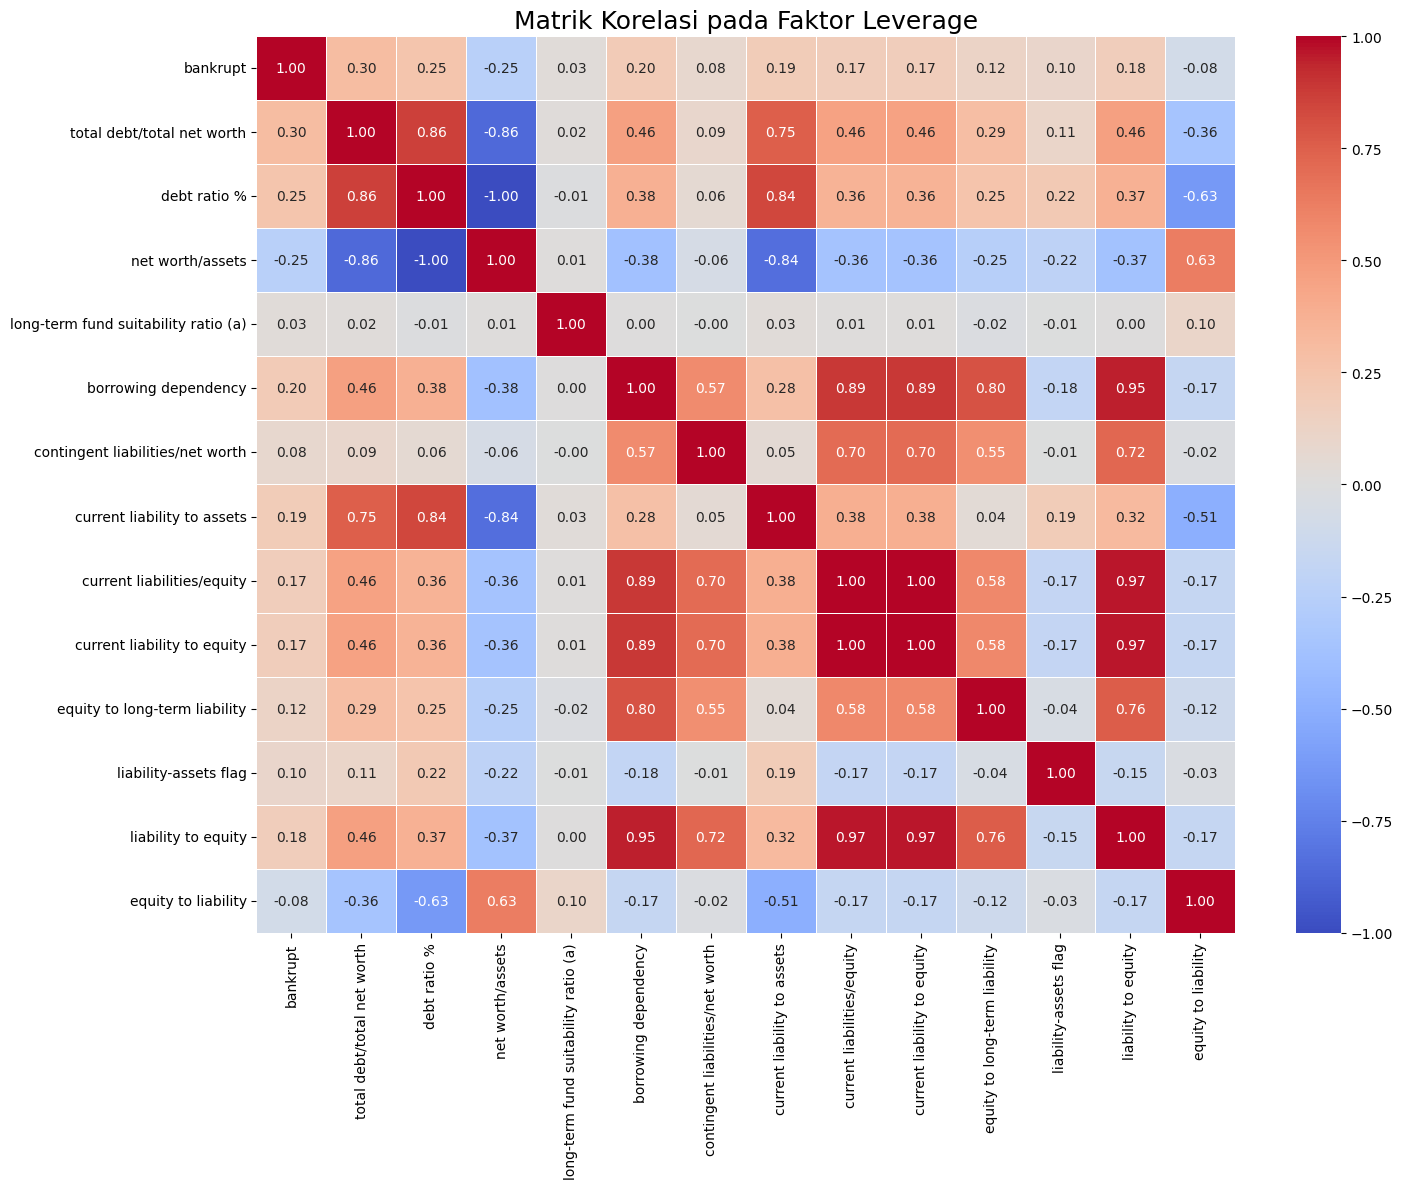

In [29]:
# get data
corr_matrix_leverage = train_set_processed[faktor_leverage].corr()

# visualize
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix_leverage,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidth=.5)

plt.title('Matrik Korelasi pada Faktor Leverage', fontsize=18)
plt.tight_layout()

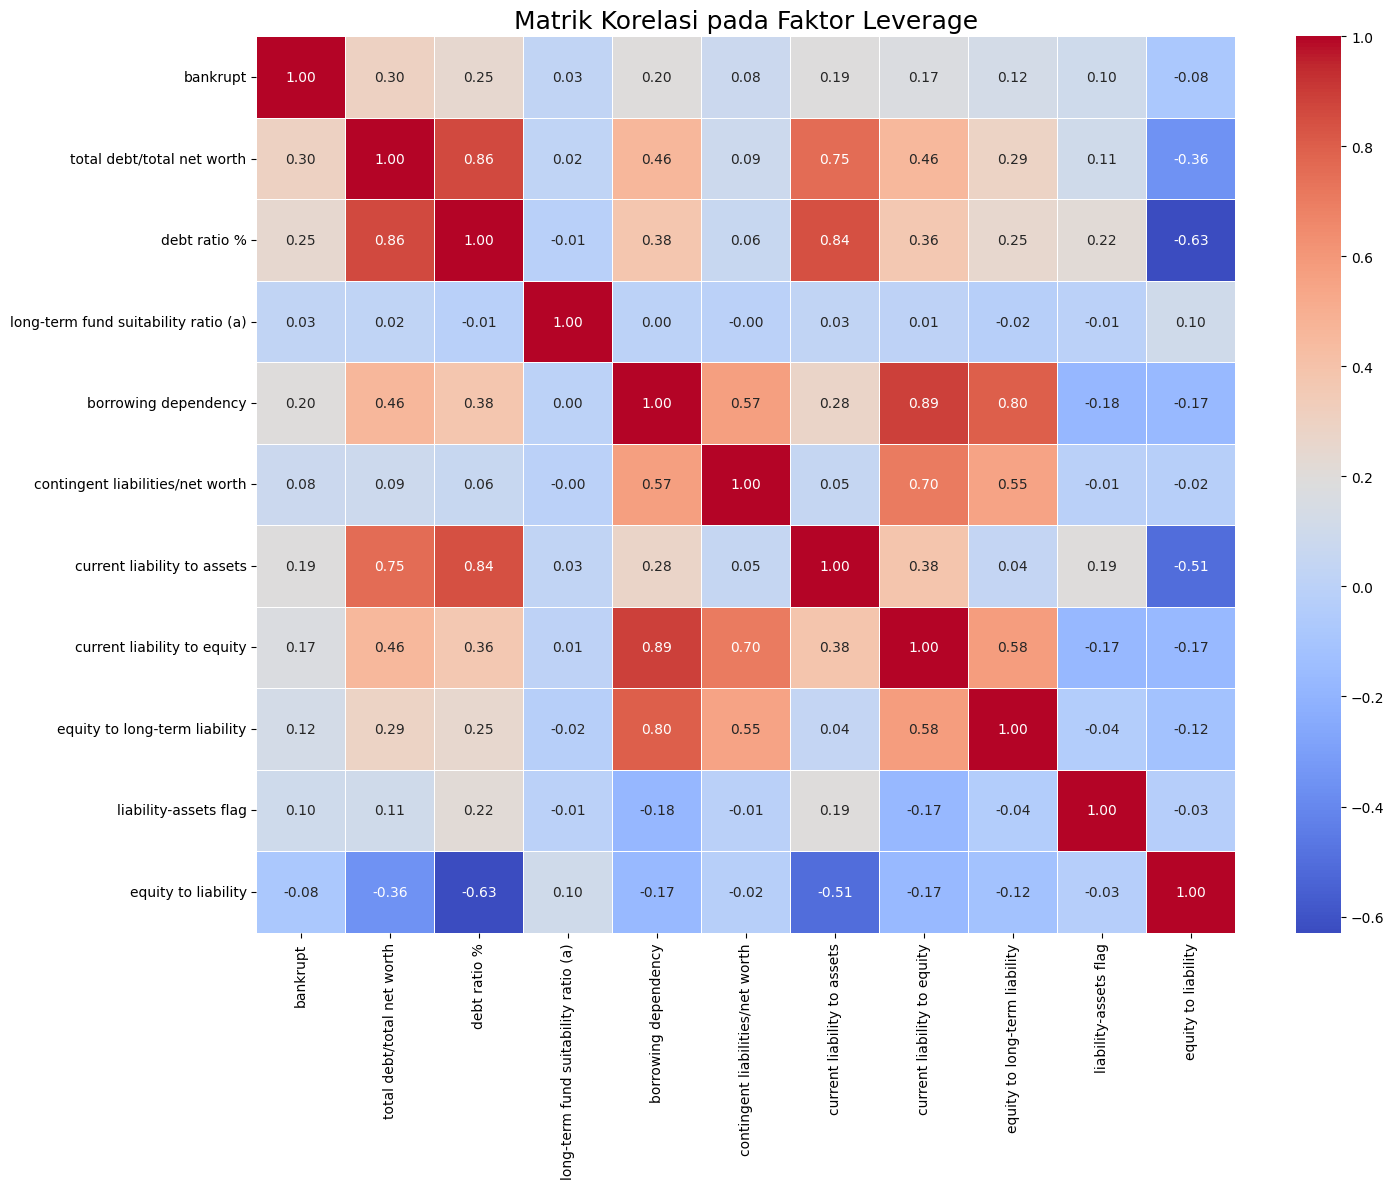

In [30]:
# define col in profitabiliatas to drop
cols_to_drop_in_leverage = [
    'net worth/assets',
    'current liabilities/equity',
    'liability to equity'
]

# drop in faktor_leverage
faktor_leverage = [item for item in faktor_leverage if item not in cols_to_drop_in_leverage]

# get data
corr_matrix_leverage = train_set_processed[faktor_leverage].corr()

# visualize
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix_leverage,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidth=.5)

plt.title('Matrik Korelasi pada Faktor Leverage', fontsize=18)
plt.tight_layout()

In [31]:
# define col in leverage to drop
cols_to_drop_in_leverage = [
    'net worth/assets',
    'current liabilities/equity',
    'liability to equity',
    'debt ratio %',
]

# drop columns
train_set_processed = train_set_processed.drop(columns=cols_to_drop_in_leverage)
test_set_processed = test_set_processed.drop(columns=cols_to_drop_in_leverage)

train_set_processed_scaled = train_set_processed_scaled.drop(columns=cols_to_drop_in_leverage)
test_set_processed_scaled = test_set_processed_scaled.drop(columns=cols_to_drop_in_leverage)

Fitur yang dipertimbngkan dihapus antara lain, fitur tersebut redundan berdasarkan nilai atau redundan dari segi perhitungan namun beda penamaannya saja.

In [32]:
train_set_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 318 to 665
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   bankrupt                                     5455 non-null   int64  
 1   operating gross margin                       5455 non-null   float64
 2   persistent eps in the last four seasons      5455 non-null   float64
 3   operating profit per person                  5455 non-null   float64
 4   net income to total assets                   5455 non-null   float64
 5   net income to stockholder's equity           5455 non-null   float64
 6   cash flow rate                               5455 non-null   float64
 7   cash flow per share                          5455 non-null   float64
 8   current ratio                                5455 non-null   float64
 9   quick ratio                                  5455 non-null   float64
 10  work

### Faktor Efisiensi & Aktivitas Perusahaan

In [16]:
faktor_efisiensi_aktivitas = [
    'bankrupt',
    'revenue per share (yuan ¥)',
    'total asset turnover',
    'total expense/assets'
]

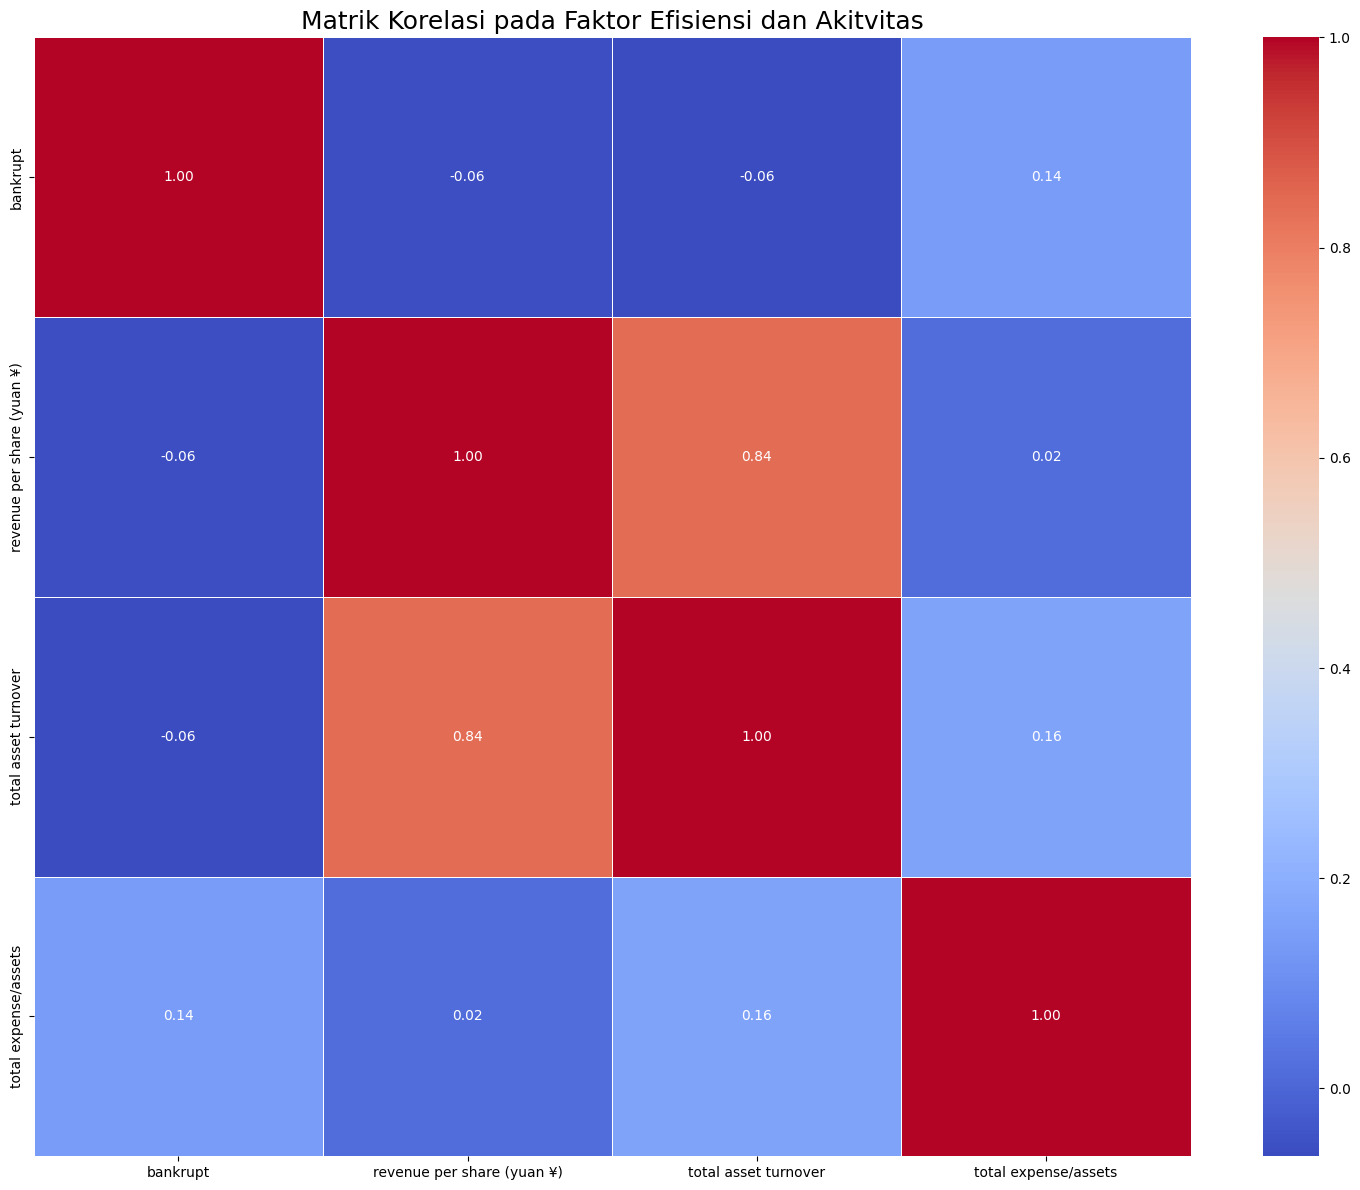

In [33]:
# get data
corr_matrix_efficiency = train_set_processed[faktor_efisiensi_aktivitas].corr()

# visualize
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix_efficiency,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidth=.5)

plt.title('Matrik Korelasi pada Faktor Efisiensi dan Akitvitas', fontsize=18)
plt.tight_layout()

revenue per share (yuan ¥) dan total asset turnover, keduanya memiliki kekuatan prediktif yang sama persis terhadap target. Dalam kasus seperti ini, kita bisa memilih berdasarkan mana yang lebih umum atau mudah diinterpretasikan. total asset turnover adalah metrik efisiensi yang sangat standar dan mencakup keseluruhan aset perusahaan.

In [34]:
# define col in efisiensi dan aktivitas to drop
cols_to_drop_in_efficiency = [
    'revenue per share (yuan ¥)'
]

# drop columns
train_set_processed = train_set_processed.drop(columns=cols_to_drop_in_efficiency)
test_set_processed = test_set_processed.drop(columns=cols_to_drop_in_efficiency)

train_set_processed_scaled = train_set_processed_scaled.drop(columns=cols_to_drop_in_efficiency)
test_set_processed_scaled = test_set_processed_scaled.drop(columns=cols_to_drop_in_efficiency)

In [35]:
train_set_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 318 to 665
Data columns (total 40 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   bankrupt                                     5455 non-null   int64  
 1   operating gross margin                       5455 non-null   float64
 2   persistent eps in the last four seasons      5455 non-null   float64
 3   operating profit per person                  5455 non-null   float64
 4   net income to total assets                   5455 non-null   float64
 5   net income to stockholder's equity           5455 non-null   float64
 6   cash flow rate                               5455 non-null   float64
 7   cash flow per share                          5455 non-null   float64
 8   current ratio                                5455 non-null   float64
 9   quick ratio                                  5455 non-null   float64
 10  work

### Faktor Pertumbuhan

In [17]:
faktor_pertumbuhan = [
    'bankrupt',
    'after-tax net profit growth rate',
    'regular net profit growth rate',
    'net value growth rate',
    'total asset return growth rate ratio'
]

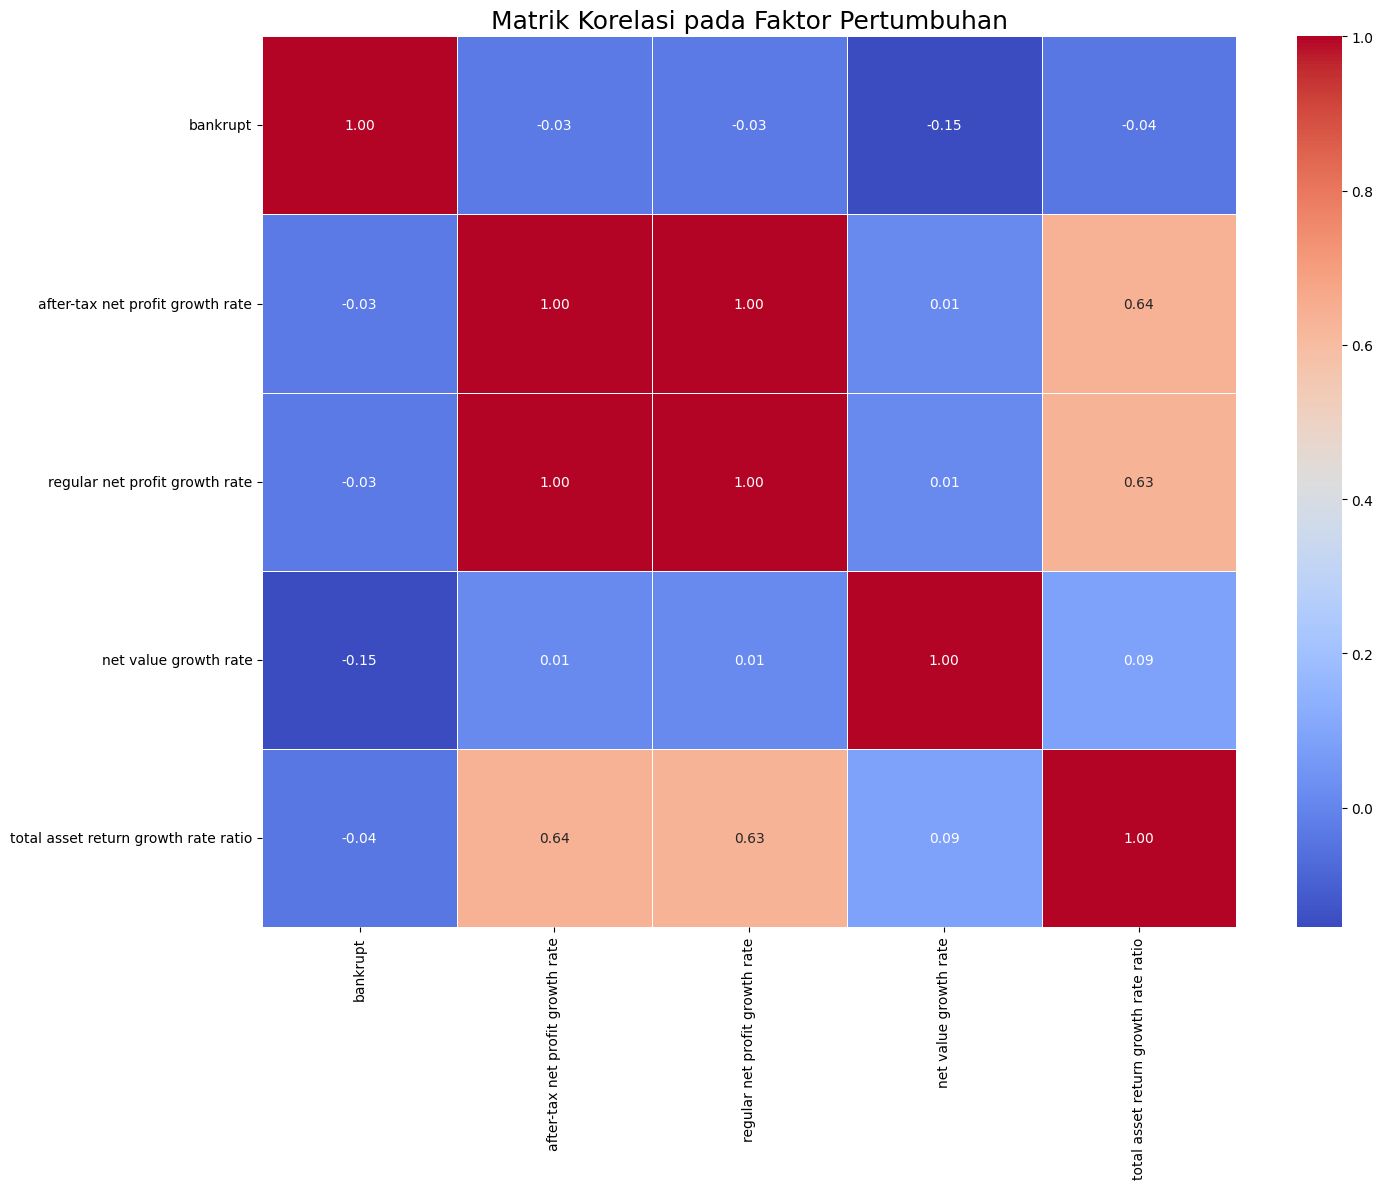

In [36]:
# get data
corr_matrix_growth = train_set_processed[faktor_pertumbuhan].corr()

# visualize
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix_growth,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidth=.5)

plt.title('Matrik Korelasi pada Faktor Pertumbuhan', fontsize=18)
plt.tight_layout()

In [37]:
# define col in faktor pertumbuhan to drop
cols_to_drop_in_growth = [
    'regular net profit growth rate'
]

# drop columns
train_set_processed = train_set_processed.drop(columns=cols_to_drop_in_growth)
test_set_processed = test_set_processed.drop(columns=cols_to_drop_in_growth)

train_set_processed_scaled = train_set_processed_scaled.drop(columns=cols_to_drop_in_growth)
test_set_processed_scaled = test_set_processed_scaled.drop(columns=cols_to_drop_in_growth)

In [38]:
train_set_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 318 to 665
Data columns (total 39 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   bankrupt                                     5455 non-null   int64  
 1   operating gross margin                       5455 non-null   float64
 2   persistent eps in the last four seasons      5455 non-null   float64
 3   operating profit per person                  5455 non-null   float64
 4   net income to total assets                   5455 non-null   float64
 5   net income to stockholder's equity           5455 non-null   float64
 6   cash flow rate                               5455 non-null   float64
 7   cash flow per share                          5455 non-null   float64
 8   current ratio                                5455 non-null   float64
 9   quick ratio                                  5455 non-null   float64
 10  work

In [39]:
test_set_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1364 entries, 1244 to 652
Data columns (total 39 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   bankrupt                                     1364 non-null   int64  
 1   operating gross margin                       1364 non-null   float64
 2   persistent eps in the last four seasons      1364 non-null   float64
 3   operating profit per person                  1364 non-null   float64
 4   net income to total assets                   1364 non-null   float64
 5   net income to stockholder's equity           1364 non-null   float64
 6   cash flow rate                               1364 non-null   float64
 7   cash flow per share                          1364 non-null   float64
 8   current ratio                                1364 non-null   float64
 9   quick ratio                                  1364 non-null   float64
 10  wor

### Faktor Valuasi Pasar

In [18]:
faktor_valuasi_pasar = [
    'bankrupt',
    'net value per share (b)',
    'net value per share (a)',
    'net value per share (c)',
    'cash reinvestment %',
    'working capital/equity'
]

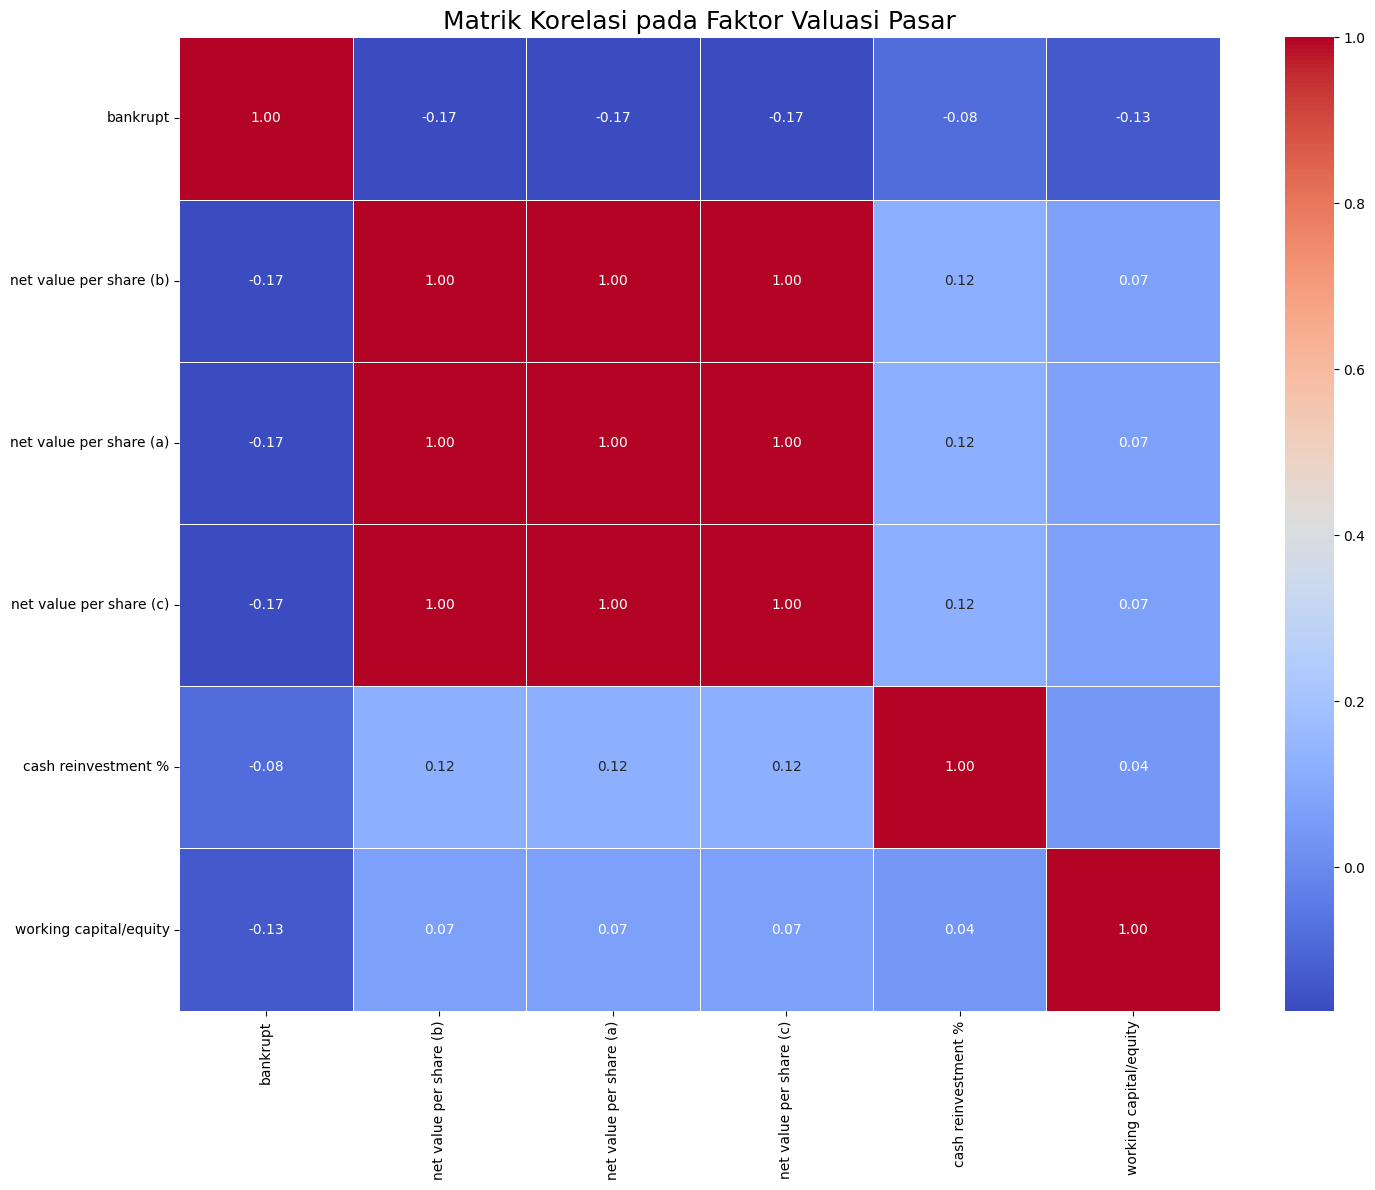

In [40]:
# get data
corr_matrix_market = train_set_processed[faktor_valuasi_pasar].corr()

# visualize
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix_market,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidth=.5)

plt.title('Matrik Korelasi pada Faktor Valuasi Pasar', fontsize=18)
plt.tight_layout()

In [41]:
train_set_processed[faktor_valuasi_pasar].head()

,bankrupt,net value per share (b),net value per share (a),net value per share (c),cash reinvestment %,working capital/equity
318,0,0.200919,0.200919,0.200919,0.380565,0.733835
5796,0,0.195946,0.195946,0.195946,0.383210,0.741153
4454,0,0.187898,0.187898,0.187898,0.374818,0.736437
2225,0,0.183052,0.183052,0.183052,0.390075,0.740521
3249,0,0.162151,0.162151,0.162151,0.367488,0.738884


kecurigaan baik  net value per share a, b atau c memiliki nilai yang sama ata identif. untuk itu, perlu dicek apakah beneran duplikat atau tidak

In [43]:
len(train_set_processed[['net value per share (b)', 'net value per share (a)', 'net value per share (c)']].drop_duplicates())/len(train_set_processed)

0.39010082493125575

In [45]:
train_set_processed[['net value per share (b)', 'net value per share (a)', 'net value per share (c)']].duplicated().sum()

np.int64(3327)

hasil yang tidak bernilia 1 dan jumlah duplikat mencapai lebih dari setengah jumlah data, fitur yang akan dipertahankan adalah net value per share (a)

In [46]:
# define col in profitabiliatas to drop
cols_to_drop_in_market = [
    'net value per share (b)',
    'net value per share (c)'
]

# drop columns
train_set_processed = train_set_processed.drop(columns=cols_to_drop_in_market)
test_set_processed = test_set_processed.drop(columns=cols_to_drop_in_market)

train_set_processed_scaled = train_set_processed_scaled.drop(columns=cols_to_drop_in_market)
test_set_processed_scaled = test_set_processed_scaled.drop(columns=cols_to_drop_in_market)

In [47]:
train_set_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 318 to 665
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   bankrupt                                     5455 non-null   int64  
 1   operating gross margin                       5455 non-null   float64
 2   persistent eps in the last four seasons      5455 non-null   float64
 3   operating profit per person                  5455 non-null   float64
 4   net income to total assets                   5455 non-null   float64
 5   net income to stockholder's equity           5455 non-null   float64
 6   cash flow rate                               5455 non-null   float64
 7   cash flow per share                          5455 non-null   float64
 8   current ratio                                5455 non-null   float64
 9   quick ratio                                  5455 non-null   float64
 10  work

### Faktor Lainnya

In [19]:
faktor_lainnya = [
    'bankrupt',
    'tax rate (a)',
    'inventory and accounts receivable/net value',
    'fixed assets to assets'
]

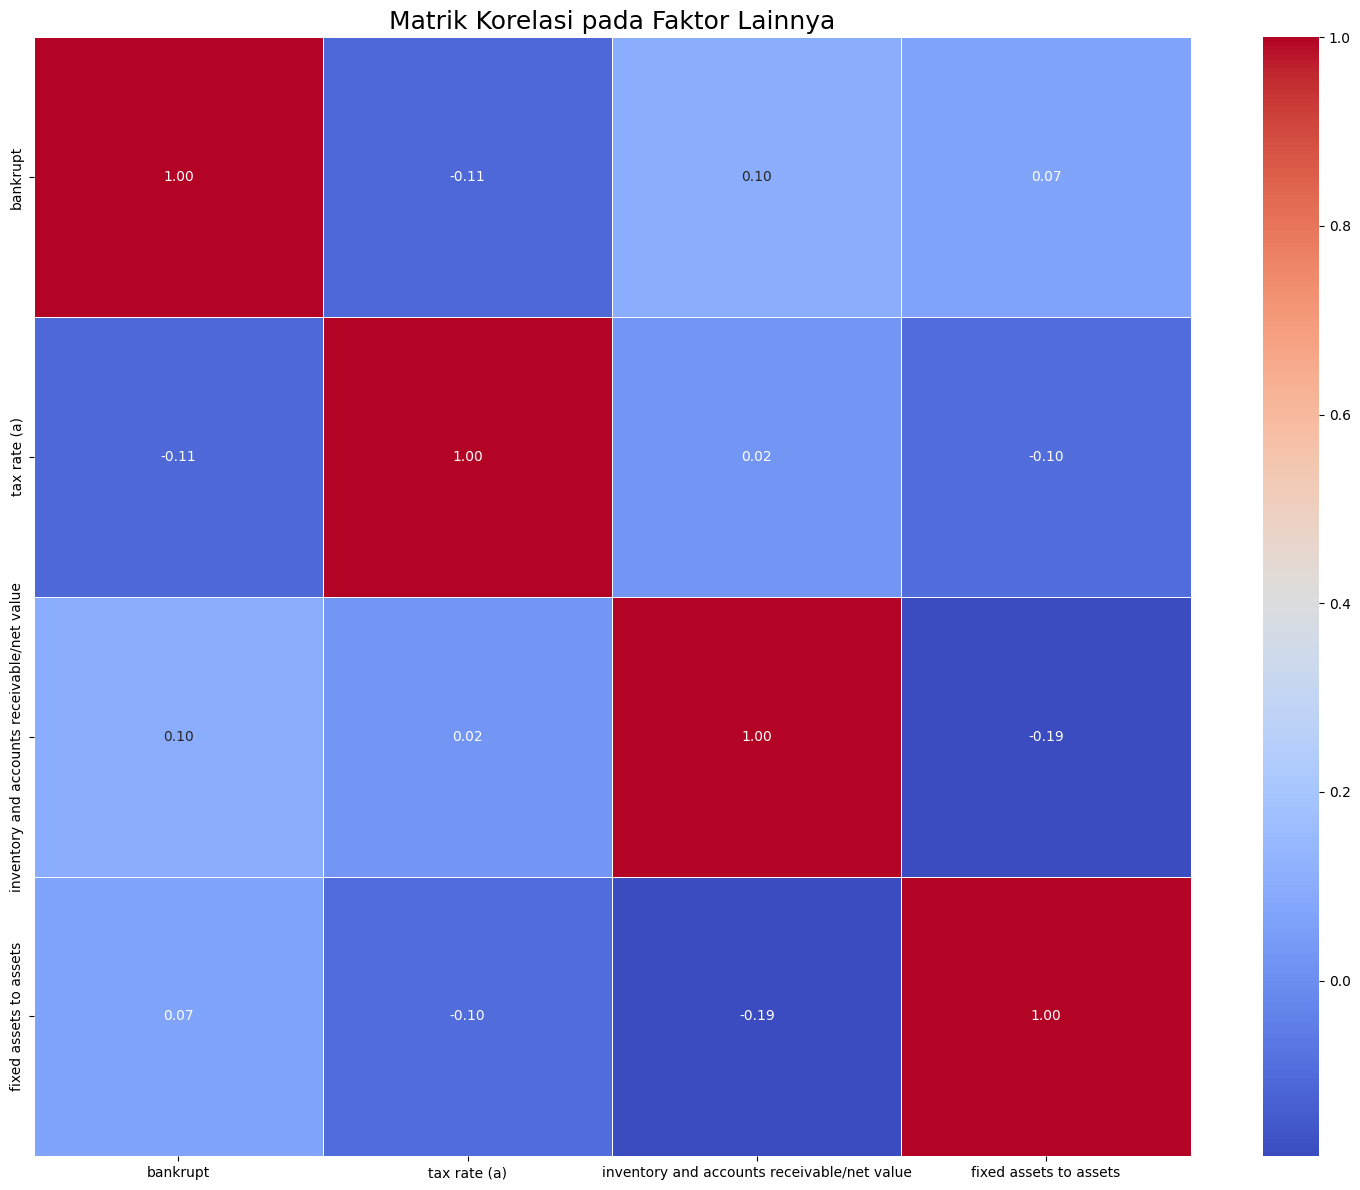

In [48]:
# get data
corr_matrix_others = train_set_processed[faktor_lainnya].corr()

# visualize
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix_others,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidth=.5)

plt.title('Matrik Korelasi pada Faktor Lainnya', fontsize=18)
plt.tight_layout()

tidak ada yang redundan dan lanjut untuk mengecek seluruh fitur

### All Features

In [49]:
 train_set_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 318 to 665
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   bankrupt                                     5455 non-null   int64  
 1   operating gross margin                       5455 non-null   float64
 2   persistent eps in the last four seasons      5455 non-null   float64
 3   operating profit per person                  5455 non-null   float64
 4   net income to total assets                   5455 non-null   float64
 5   net income to stockholder's equity           5455 non-null   float64
 6   cash flow rate                               5455 non-null   float64
 7   cash flow per share                          5455 non-null   float64
 8   current ratio                                5455 non-null   float64
 9   quick ratio                                  5455 non-null   float64
 10  work

In [51]:
test_set_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1364 entries, 1244 to 652
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   bankrupt                                     1364 non-null   int64  
 1   operating gross margin                       1364 non-null   float64
 2   persistent eps in the last four seasons      1364 non-null   float64
 3   operating profit per person                  1364 non-null   float64
 4   net income to total assets                   1364 non-null   float64
 5   net income to stockholder's equity           1364 non-null   float64
 6   cash flow rate                               1364 non-null   float64
 7   cash flow per share                          1364 non-null   float64
 8   current ratio                                1364 non-null   float64
 9   quick ratio                                  1364 non-null   float64
 10  wor

In [52]:
train_set_processed_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 318 to 665
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   operating gross margin                       5455 non-null   float64
 1   persistent eps in the last four seasons      5455 non-null   float64
 2   operating profit per person                  5455 non-null   float64
 3   net income to total assets                   5455 non-null   float64
 4   net income to stockholder's equity           5455 non-null   float64
 5   cash flow rate                               5455 non-null   float64
 6   cash flow per share                          5455 non-null   float64
 7   current ratio                                5455 non-null   float64
 8   quick ratio                                  5455 non-null   float64
 9   working capital to total assets              5455 non-null   float64
 10  quic

In [53]:
test_set_processed_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1364 entries, 1244 to 652
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   operating gross margin                       1364 non-null   float64
 1   persistent eps in the last four seasons      1364 non-null   float64
 2   operating profit per person                  1364 non-null   float64
 3   net income to total assets                   1364 non-null   float64
 4   net income to stockholder's equity           1364 non-null   float64
 5   cash flow rate                               1364 non-null   float64
 6   cash flow per share                          1364 non-null   float64
 7   current ratio                                1364 non-null   float64
 8   quick ratio                                  1364 non-null   float64
 9   working capital to total assets              1364 non-null   float64
 10  qui

In [54]:
train_set_processed.corr().style.background_gradient(cmap='coolwarm')

,bankrupt,operating gross margin,persistent eps in the last four seasons,operating profit per person,net income to total assets,net income to stockholder's equity,cash flow rate,cash flow per share,current ratio,quick ratio,working capital to total assets,quick assets/total assets,cash/total assets,cash flow to total assets,cfo to assets,cash flow to equity,current liability to current assets,total debt/total net worth,long-term fund suitability ratio (a),borrowing dependency,contingent liabilities/net worth,current liability to assets,current liability to equity,equity to long-term liability,liability-assets flag,equity to liability,total asset turnover,total expense/assets,after-tax net profit growth rate,net value growth rate,total asset return growth rate ratio,net value per share (a),cash reinvestment %,working capital/equity,tax rate (a),inventory and accounts receivable/net value,fixed assets to assets
bankrupt,1.000000,-0.097482,-0.221009,-0.092555,-0.316354,-0.206648,-0.076145,-0.070255,-0.059978,-0.105494,-0.187665,-0.083015,-0.097347,-0.074625,-0.112112,-0.072585,0.180961,0.299971,0.026604,0.196911,0.078302,0.189893,0.172577,0.122902,0.097319,-0.081135,-0.064529,0.142643,-0.032462,-0.154569,-0.037570,-0.172919,-0.083626,-0.134602,-0.108048,0.101110,0.073141
operating gross margin,-0.097482,1.000000,0.268412,0.247396,0.301220,0.099814,0.416840,0.168295,-0.133289,0.242640,0.249020,0.158944,0.248059,0.112786,0.234061,0.035163,-0.151061,-0.257764,0.011172,-0.105781,-0.025753,-0.193342,-0.091034,-0.072470,-0.026850,0.092266,-0.087512,0.233317,0.056371,0.136720,0.063963,0.153863,0.142982,0.067414,0.069190,-0.099223,-0.059889
persistent eps in the last four seasons,-0.221009,0.268412,1.000000,0.356871,0.707586,0.297078,0.221807,0.471319,0.036281,0.126179,0.256867,0.216967,0.230450,0.213254,0.339450,0.129761,-0.168932,-0.203319,0.046531,-0.180549,-0.059922,-0.096776,-0.120887,-0.115891,-0.079544,0.037385,0.222200,-0.181298,0.078832,0.410780,0.138959,0.742565,0.222860,0.119055,0.170335,-0.064880,-0.166223
operating profit per person,-0.092555,0.247396,0.356871,1.000000,0.309827,0.133171,0.168015,0.064683,-0.083758,0.011370,0.163313,0.010860,0.048141,0.074803,0.098707,0.020409,-0.064248,-0.006716,0.173426,-0.026060,-0.026742,0.074579,-0.005339,-0.055523,-0.021767,-0.045858,0.064537,-0.141386,0.044817,0.122067,0.046134,0.272312,0.000026,0.084719,0.064303,0.104151,-0.147717
net income to total assets,-0.316354,0.301220,0.707586,0.309827,1.000000,0.381483,0.303930,0.289764,0.053174,0.151672,0.297692,0.179908,0.190001,0.258051,0.426716,0.111585,-0.215968,-0.308123,0.017996,-0.176604,-0.039312,-0.210066,-0.149651,-0.092893,-0.170954,0.070414,0.183652,-0.479886,0.118216,0.381645,0.145562,0.510804,0.267323,0.105021,0.225100,-0.102420,-0.120433
net income to stockholder's equity,-0.206648,0.099814,0.297078,0.133171,0.381483,1.000000,0.085220,0.114227,0.025642,0.056210,0.128941,0.051525,0.052107,0.063676,0.158679,0.107328,-0.079535,-0.224316,0.011214,-0.753066,-0.524054,-0.124799,-0.827635,-0.425364,0.212211,0.035193,0.038910,-0.203203,0.015834,0.161405,0.051867,0.195546,0.227782,0.620434,0.096938,-0.403583,-0.035396
cash flow rate,-0.076145,0.416840,0.221807,0.168015,0.303930,0.085220,1.000000,0.382441,0.053525,0.292325,0.153996,0.038223,0.231691,0.221954,0.641609,0.094255,-0.134589,-0.244971,0.034526,-0.097357,-0.010621,-0.282195,-0.096825,-0.043448,-0.008875,0.244473,-0.055125,-0.083486,0.024312,-0.026379,0.021699,0.180746,0.388851,0.020631,0.063669,-0.143962,0.084462
cash flow per share,-0.070255,0.168295,0.471319,0.064683,0.289764,0.114227,0.382441,1.000000,0.022117,0.096325,0.067079,0.101454,0.241836,0.240993,0.717009,0.206755,-0.049740,-0.144881,-0.028271,-0.122550,-0.011091,-0.126510,-0.043232,-0.038913,-0.007875,0.043155,0.074656,-0.020145,0.009017,0.088780,0.043183,0.362448,0.749540,-0.010411,0.077092,-0.130310,0.051210
current ratio,-0.059978,-0.133289,0.036281,-0.083758,0.053174,0.025642,0.053525,0.022117,1.000000,0.631550

In [58]:
corr_matrix_all_feature = train_set_processed.corr()

# created stacked
corr_stacked = corr_matrix_all_feature.stack()

corr_df = corr_stacked.reset_index()
corr_df.columns = ['Fitur_1', 'Fitur_2', 'Korelasi']

corr_df = corr_df[corr_df['Fitur_1'] != corr_df['Fitur_2']]

# filter based on value (above .7)
pasangan_korelasi_tinggi = corr_df[abs(corr_df['Korelasi']) > 0.8]

# create column for feature to target
target_correlations = corr_matrix_all_feature['bankrupt']
pasangan_korelasi_tinggi['Corr_Fitur1_vs_Target'] = pasangan_korelasi_tinggi['Fitur_1'].map(target_correlations)
pasangan_korelasi_tinggi['Corr_Fitur2_vs_Target'] = pasangan_korelasi_tinggi['Fitur_2'].map(target_correlations)

print("--- Pasangan Fitur Korelasi Tinggi dengan Korelasi terhadap Target ---")
display(pasangan_korelasi_tinggi)


--- Pasangan Fitur Korelasi Tinggi dengan Korelasi terhadap Target ---


/tmp/ipython-input-2514763507.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pasangan_korelasi_tinggi['Corr_Fitur1_vs_Target'] = pasangan_korelasi_tinggi['Fitur_1'].map(target_correlations)
/tmp/ipython-input-2514763507.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pasangan_korelasi_tinggi['Corr_Fitur2_vs_Target'] = pasangan_korelasi_tinggi['Fitur_2'].map(target_correlations)


,Fitur_1,Fitur_2,Korelasi,Corr_Fitur1_vs_Target,Corr_Fitur2_vs_Target
207,net income to stockholder's equity,current liability to equity,-0.827635,-0.206648,0.172577
550,cfo to assets,cash reinvestment %,0.802754,-0.112112,-0.083626
725,borrowing dependency,current liability to equity,0.890244,0.196911,0.172577
726,borrowing dependency,equity to long-term liability,0.801043,0.196911,0.122902
773,contingent liabilities/net worth,working capital/equity,-0.811591,0.078302,-0.134602
819,current liability to equity,net income to stockholder's equity,-0.827635,0.172577,-0.206648
833,current liability to equity,borrowing dependency,0.890244,0.172577,0.196911
870,equity to long-term liability,borrowing dependency,0.801043,0.122902,0.196911
1198,cash reinvestment %,cfo to assets,0.802754,-0.083626,-0.112112
1241,working capital/equity,contingent liabilities/net worth,-0.811591,-0.134602,0.078302


* current liability to equity: Dihapus.
  * Korelasinya dengan target (0.17) lebih lemah daripada pasangannya, borrowing dependency (0.19).
* equity to long-term liability: Dihapus.
  * Korelasinya dengan target (0.12) juga lebih lemah daripada borrowing dependency (0.19).
* contingent liabilities/net worth: Dihapus.
  * Korelasi absolutnya dengan target (0.078) lebih lemah daripada pasangannya, working capital/equity (-0.134).

In [59]:
another_cols_to_drop = [
    'current liability to equity',
    'equity to long-term liability',
    'contingent liabilities/net worth',
    'cash reinvestment %'
]

# drop columns
train_set_processed = train_set_processed.drop(columns=another_cols_to_drop)
test_set_processed = test_set_processed.drop(columns=another_cols_to_drop)

train_set_processed_scaled = train_set_processed_scaled.drop(columns=another_cols_to_drop)
test_set_processed_scaled = test_set_processed_scaled.drop(columns=another_cols_to_drop)

In [60]:
train_set_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 318 to 665
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   bankrupt                                     5455 non-null   int64  
 1   operating gross margin                       5455 non-null   float64
 2   persistent eps in the last four seasons      5455 non-null   float64
 3   operating profit per person                  5455 non-null   float64
 4   net income to total assets                   5455 non-null   float64
 5   net income to stockholder's equity           5455 non-null   float64
 6   cash flow rate                               5455 non-null   float64
 7   cash flow per share                          5455 non-null   float64
 8   current ratio                                5455 non-null   float64
 9   quick ratio                                  5455 non-null   float64
 10  work

fitur lain yang akan dihapus karena berpotensi memiliki hubungan terhadap target cukup jauh atau hubungan yang kurang langsung, antara lain:
1. `fixed assets to assets`: fitur ini lebih menggambarkan struktur aset perusahaan (padat modal atau tidak) daripada kesehatan keuangan jangka pendek yang lebih krusial.
2. `tax rate (a)`: tarif pajak lebih merupakan akibat dari profitabilitas dan regulasi, bukan penyebab langsung kesulitan keuangan.
3. `inventory and accounts receivable/net value`: Sinyal likuiditasnya kemungkinan besar sudah terwakili oleh rasio lain yang lebih kuat seperti current ratio.

In [61]:
another_cols_to_drop = [
    'fixed assets to assets',
    'tax rate (a)',
    'inventory and accounts receivable/net value'
]

# drop columns
train_set_processed = train_set_processed.drop(columns=another_cols_to_drop)
test_set_processed = test_set_processed.drop(columns=another_cols_to_drop)

train_set_processed_scaled = train_set_processed_scaled.drop(columns=another_cols_to_drop)
test_set_processed_scaled = test_set_processed_scaled.drop(columns=another_cols_to_drop)

# Save to pickle

In [62]:
# final check
train_set_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 318 to 665
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   bankrupt                                 5455 non-null   int64  
 1   operating gross margin                   5455 non-null   float64
 2   persistent eps in the last four seasons  5455 non-null   float64
 3   operating profit per person              5455 non-null   float64
 4   net income to total assets               5455 non-null   float64
 5   net income to stockholder's equity       5455 non-null   float64
 6   cash flow rate                           5455 non-null   float64
 7   cash flow per share                      5455 non-null   float64
 8   current ratio                            5455 non-null   float64
 9   quick ratio                              5455 non-null   float64
 10  working capital to total assets          5455 non-nu

In [63]:
test_set_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1364 entries, 1244 to 652
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   bankrupt                                 1364 non-null   int64  
 1   operating gross margin                   1364 non-null   float64
 2   persistent eps in the last four seasons  1364 non-null   float64
 3   operating profit per person              1364 non-null   float64
 4   net income to total assets               1364 non-null   float64
 5   net income to stockholder's equity       1364 non-null   float64
 6   cash flow rate                           1364 non-null   float64
 7   cash flow per share                      1364 non-null   float64
 8   current ratio                            1364 non-null   float64
 9   quick ratio                              1364 non-null   float64
 10  working capital to total assets          1364 non-n

In [64]:
train_set_processed_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 318 to 665
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   operating gross margin                   5455 non-null   float64
 1   persistent eps in the last four seasons  5455 non-null   float64
 2   operating profit per person              5455 non-null   float64
 3   net income to total assets               5455 non-null   float64
 4   net income to stockholder's equity       5455 non-null   float64
 5   cash flow rate                           5455 non-null   float64
 6   cash flow per share                      5455 non-null   float64
 7   current ratio                            5455 non-null   float64
 8   quick ratio                              5455 non-null   float64
 9   working capital to total assets          5455 non-null   float64
 10  quick assets/total assets                5455 non-nu

In [65]:
test_set_processed_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1364 entries, 1244 to 652
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   operating gross margin                   1364 non-null   float64
 1   persistent eps in the last four seasons  1364 non-null   float64
 2   operating profit per person              1364 non-null   float64
 3   net income to total assets               1364 non-null   float64
 4   net income to stockholder's equity       1364 non-null   float64
 5   cash flow rate                           1364 non-null   float64
 6   cash flow per share                      1364 non-null   float64
 7   current ratio                            1364 non-null   float64
 8   quick ratio                              1364 non-null   float64
 9   working capital to total assets          1364 non-null   float64
 10  quick assets/total assets                1364 non-n

In [66]:
# save into different variable
train_set_processed_final = train_set_processed.copy()
test_set_processed_final = test_set_processed.copy()


train_set_processed_scaled_final = train_set_processed_scaled.copy()
test_set_processed_scaled_final = test_set_processed_scaled.copy()

# define path to save data processed
path_to_dump = ('/content/drive/MyDrive/Dibimbing_DS/final_project_DS/dataset/processed/')

# save data
joblib.dump(train_set_processed_final, path_to_dump+'train_set_processed_final.joblib')
joblib.dump(test_set_processed_final, path_to_dump+'test_set_processed_final.joblib')

joblib.dump(train_set_processed_scaled_final, path_to_dump+'train_set_processed_scaled_final.joblib')
joblib.dump(test_set_processed_scaled_final, path_to_dump+'test_set_processed_scaled_final.joblib')

['/content/drive/MyDrive/Dibimbing_DS/final_project_DS/dataset/processed/test_set_processed_scaled_final.joblib']